In [1]:
#Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import libraries useful for building the pipeline and join their branches
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


#import modules created for data preparation phase
import my_utils
import missing_val_imput
import feature_select
import preprocessing
import adhoc_transf

#import libraries for data preparation phase
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder


#import libraries from modelling phase
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

#import classifiers
#import Ensemble Trees Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
import xgboost as xgb

#to save model fit with GridSearchCV and avoid longer waits
import joblib

In [2]:
#Loading the dataset
#path_data: XXX
path_data=r'C:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease_Predictor\kidney_disease.csv'

df=pd.read_csv(path_data)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
target_feature='classification'
numerical_feats=['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
nominal_feats=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
ordinal_feats=['sg','al','su',]

len_numerical_feats=len(numerical_feats)
len_nominal_feats=len(nominal_feats)
len_ordinal_feats=len(ordinal_feats)

######################################
#Step 0: Perform EDA to detect missing values, imbalanced data, strange characters,etc.
#############################

In [4]:
#Adhoc functions to manage wrong characters
#Below this an example for CKD dataset
def misspellingCorrector(df):
    df.iloc[:] = df.iloc[:].str.replace(r'\t','')
    df.iloc[:] = df.iloc[:].str.replace(r' ','')
    return df

In [5]:
#############################
#Step 1 Solving wrong characters of dataset
#############################
#Set column id as index


# CKD case does only have misspellingCorrector
# df_content_solver=Pipeline([('fx1', misspellingCorrector()),
#                             ('fx2',function2()),
#                             ('fx3',function3())
# ])

In [6]:
df.set_index('id', inplace=True)

In [7]:
feat_list =['classification','dm','cad']
#df.loc[:,feat_list]=adhoc_transf.misspellingTransformer().fit_transform(df.loc[:,feat_list])
for i in feat_list:
     print('i',i)
     df.loc[:,i]=misspellingCorrector((df.loc[:,i]))
my_utils.df_values(df)

i classification
i dm
i cad
*****start of feature  age *************************
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
*****end of feature  sg ************************** 

*****start of feature  al *************************
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
*****end of feature  al ************************** 

*****start of feature  su *************************
0.0    290


c:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease_Predictor\pipeline_CKDcase_explainability_MBEC.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\k5000751\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
df.loc[:,numerical_feats]=adhoc_transf.Numeric_Cast_Column().fit_transform(df.loc[:,numerical_feats])
df[numerical_feats].dtypes


>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column


age     float64
bp      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
wc      float64
rc      float64
dtype: object

In [9]:
df.loc[:,nominal_feats]=adhoc_transf.Category_Cast_Column().fit_transform(df.loc[:,nominal_feats])
df[nominal_feats].dtypes


>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column


rbc      category
pc       category
pcc      category
ba       category
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
dtype: object

In [10]:
df.loc[:,ordinal_feats]=adhoc_transf.Category_Cast_Column().fit_transform(df.loc[:,ordinal_feats])
df[ordinal_feats].dtypes


>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column


sg    category
al    category
su    category
dtype: object

In [11]:
feat_list_tocast=['al','su']
df.loc[:,feat_list_tocast]=adhoc_transf.CastDown().fit_transform(df.loc[:,feat_list_tocast])


>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown


In [12]:
#Exploring wrong characters
my_utils.df_values(df)

*****start of feature  age *************************
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.02     106
1.01      84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
*****end of feature  sg ************************** 

*****start of feature  al *************************
0.0    199
1.0     44
2.0     43
3.0     43
4.0     25
Name: al, dtype: int64
*****end of feature  al ************************** 

*****start of feature  su *************************
0.0    290
2.0     18
4.0     16
3.0     14
1.0   

In [13]:
#Recoding target feature since the label encoder makes 0:ckd and 1:nonckd
#recoding categorical variables sex, marital status, job_situation
df['classification']=df['classification'].map({'notckd':0, 'ckd':1})

In [14]:
#############################
##Step 2 Train-Test splitting
#############################

#Split the dataset into train and test
test_ratio_split=0.3
train_set,test_set=train_test_split(df, test_size=test_ratio_split, random_state=42, stratify=df[target_feature])

X_train=train_set.drop(target_feature,axis=1)
y_train=train_set[target_feature].copy()

X_test=test_set.drop(target_feature,axis=1)
y_test=test_set[target_feature].copy()

In [15]:
########################################
##Step 3 Label Encoding of target value
########################################
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
le.classes_

array([0, 1], dtype=int64)

In [16]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 105]
 [  1 175]]


In [17]:
##############################
##Step 2 Building pipelines for data preparation
##############################

#Lets define 3 pipeline mode
#a) parallel approach where feature selection is performed in parallel 
# for numerical, nominal and categorical
#b) general approach where feature selection is performed as a whole for other features
#c) no feature selection is performed

#Before a data preprocessing will take place for each type of feature

pipeline_numeric_feat=Pipeline([ ('data_missing',missing_val_imput.Numeric_Imputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])

pipeline_numeric_feat_mean=Pipeline([ ('data_missing',missing_val_imput.Numeric_Imputer(strategy='mean')),
                                 ('scaler', MinMaxScaler())])

pipeline_nominal_feat=Pipeline([('data_missing',missing_val_imput.Category_Imputer()),                                 
                                 ('encoding', OrdinalEncoder())])#We dont use OneHotEncoder since it enlarges the number of nominal features 

pipeline_ordinal_feat=Pipeline([ ('data_missing',missing_val_imput.Category_Imputer(strategy='most_frequent')),
                                 ('encoding', OrdinalEncoder())])


#option a)
pipe_numeric_featsel=Pipeline([('data_prep',pipeline_numeric_feat),
                                ('feat_sel',feature_select.Feature_Selector(strategy='wrapper_RFECV') )])
pipe_nominal_featsel=Pipeline([('data_prep',pipeline_nominal_feat),
                                ('feat_sel',feature_select.Feature_Selector(strategy='wrapper_RFECV') )])
pipe_ordinal_featsel=Pipeline([('data_prep',pipeline_ordinal_feat),
                                ('feat_sel',feature_select.Feature_Selector(strategy='wrapper_RFECV') )])

dataprep_pipe_opta=ColumnTransformer([('numeric_pipe',pipe_numeric_featsel,numerical_feats),
                                    ('nominal_pipe',pipe_nominal_featsel,nominal_feats),
                                    ('ordinal_pipe',pipe_ordinal_featsel,ordinal_feats)
                                ])

#option b)
dataprep_merge_feat=ColumnTransformer([('numeric_pipe',pipeline_numeric_feat,numerical_feats),
                                    ('nominal_pipe',pipeline_nominal_feat, nominal_feats),
                                    ('ordinal_pipe',pipeline_ordinal_feat,ordinal_feats)
                                ])
dataprep_pipe_optb=Pipeline([('data_prep',dataprep_merge_feat),
                                ('feat_sel',feature_select.Feature_Selector(strategy='wrapper_RFECV') )])

#option c)
#dataprep_merge_feat is used
dataprep_merge_feat


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from Feature_Selector


ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('data_missing',
                                                  Numeric_Imputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot',
                                  'hemo', 'pcv', 'wc', 'rc']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('data_missing',
                                                  Category_Imputer()),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
                                  'appet', 'pe', 'ane']),
                                ('ordinal_pipe',
                                 Pipeline(steps=[('data_missing',
                     

In [18]:
#Checking the coding of 'sg'
arr=pipeline_ordinal_feat.fit_transform(df[['sg']])
(unique, counts) = np.unique(arr, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer
[[  0.   7.]
 [  1.  84.]
 [  2.  75.]
 [  3. 153.]
 [  4.  81.]]


In [19]:
#############################
##Step 3 Classifier initialization
#############################
#Several ensemble classifier with Cross validation will be applied
#we take decision tree as base classifier

#Init the clasfifier
dectree_clf=DecisionTreeClassifier(random_state=42)
rndforest_clf=RandomForestClassifier(random_state=42)
extratree_clf=ExtraTreesClassifier(random_state=42)
ada_clf= AdaBoostClassifier(random_state=42)
xgboost_clf= xgb.XGBClassifier(random_state=42)
#

In [20]:
#############################
##Step 4 Scoring initialization
#############################

#Lets define the scoring for the GridSearchCV
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'precision':make_scorer(precision_score),
    'f1':make_scorer(f1_score),
    'roc_auc':make_scorer(roc_auc_score),
    'mcc':make_scorer(matthews_corrcoef)    
}

In [21]:
#################################################
##Step 5 Training the data set with GridSearchCV
#################################################


##5.a Parallel approach
#######################
full_parallel_pipe_opta=Pipeline([('data_prep',dataprep_pipe_opta),('clf',dectree_clf)])

full_parallel_pipe_opta.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'data_prep', 'clf', 'data_prep__n_jobs', 'data_prep__remainder', 'data_prep__sparse_threshold', 'data_prep__transformer_weights', 'data_prep__transformers', 'data_prep__verbose', 'data_prep__verbose_feature_names_out', 'data_prep__numeric_pipe', 'data_prep__nominal_pipe', 'data_prep__ordinal_pipe', 'data_prep__numeric_pipe__memory', 'data_prep__numeric_pipe__steps', 'data_prep__numeric_pipe__verbose', 'data_prep__numeric_pipe__data_prep', 'data_prep__numeric_pipe__feat_sel', 'data_prep__numeric_pipe__data_prep__memory', 'data_prep__numeric_pipe__data_prep__steps', 'data_prep__numeric_pipe__data_prep__verbose', 'data_prep__numeric_pipe__data_prep__data_missing', 'data_prep__numeric_pipe__data_prep__scaler', 'data_prep__numeric_pipe__data_prep__data_missing__strategy', 'data_prep__numeric_pipe__data_prep__scaler__clip', 'data_prep__numeric_pipe__data_prep__scaler__copy', 'data_prep__numeric_pipe__data_prep__scaler__feature_range', 'data_prep__nume

In [22]:
param_grid_fpipe_a={'clf':[dectree_clf, rndforest_clf, extratree_clf, ada_clf, xgboost_clf],
                    'data_prep__numeric_pipe__data_prep__data_missing__strategy':['mean','median'],
                    'data_prep__numeric_pipe__feat_sel__k_out_features':[*range(1,len_numerical_feats+1)],
                    'data_prep__numeric_pipe__feat_sel__strategy':['filter_num','filter_mutinf','wrapper_RFE'],
                    'data_prep__nominal_pipe__feat_sel__k_out_features':[*range(1,len_nominal_feats+1)],
                    'data_prep__nominal_pipe__feat_sel__strategy':['filter_cat','filter_mutinf','wrapper_RFE'],
                    'data_prep__ordinal_pipe__feat_sel__k_out_features':[*range(1,len_ordinal_feats+1)],
                    'data_prep__ordinal_pipe__feat_sel__strategy':['filter_cat','filter_mutinf','wrapper_RFE']
                    }

# param_grid_fpipe_a={'clf':[dectree_clf, rndforest_clf],
#                     'data_prep__numeric_pipe__data_prep__data_missing__strategy':['median'],
#                      'data_prep__numeric_pipe__feat_sel__k_out_features':[1,2,3],
#                      'data_prep__numeric_pipe__feat_sel__strategy':['filter_num'],
#                      'data_prep__nominal_pipe__feat_sel__k_out_features':[1,2,3],
#                      'data_prep__nominal_pipe__feat_sel__strategy':['filter_cat'],
#                      'data_prep__ordinal_pipe__feat_sel__k_out_features':[1,2,3],
#                      'data_prep__ordinal_pipe__feat_sel__strategy':['filter_mutinf']
#                     }

In [23]:
if os.path.isfile(r'C:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease_Predictor\GridSearchCV_results_MBEC\clf_fpipe_a.pkl'):
    #%% Load the model saved to avoid a new fitting
    clf_fpipe_a= joblib.load(r'C:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease_Predictor\GridSearchCV_results_MBEC\clf_fpipe_a.pkl')

else:
    clf_fpipe_a=GridSearchCV(full_parallel_pipe_opta,param_grid_fpipe_a,scoring=scoring,refit='accuracy', cv=5,n_jobs=-1)
    clf_fpipe_a.fit(X_train,y_train)
    #%% Saving the model
    joblib.dump(clf_fpipe_a, r'C:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease_Predictor\GridSearchCV_results_MBEC\clf_fpipe_a.pkl', compress=1)
    


#

C:\Users\k5000751\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.23.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\k5000751\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\k5000751\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use 

In [24]:
print('Params of best estimator of clf_fpipe_a:', clf_fpipe_a.best_params_)
# Params of best estimator of clf_fpipe_a: {'clf': RandomForestClassifier(random_state=42), 
# 'data_prep__nominal_pipe__feat_sel__k_out_features': 5,
#  'data_prep__nominal_pipe__feat_sel__strategy': 'wrapper_RFE',
#  'data_prep__numeric_pipe__data_prep__data_missing__strategy': 'mean',
#  'data_prep__numeric_pipe__feat_sel__k_out_features': 1,
#  'data_prep__numeric_pipe__feat_sel__strategy': 'filter_num',
#  'data_prep__ordinal_pipe__feat_sel__k_out_features': 1,
#  'data_prep__ordinal_pipe__feat_sel__strategy': 'filter_mutinf'}
print('Score of best estimator of clf_fpipe_a:', clf_fpipe_a.best_score_)
#Score of best estimator of clf_fpipe_a: 1.0

Params of best estimator of clf_fpipe_a: {'clf': RandomForestClassifier(random_state=42), 'data_prep__nominal_pipe__feat_sel__k_out_features': 5, 'data_prep__nominal_pipe__feat_sel__strategy': 'wrapper_RFE', 'data_prep__numeric_pipe__data_prep__data_missing__strategy': 'mean', 'data_prep__numeric_pipe__feat_sel__k_out_features': 1, 'data_prep__numeric_pipe__feat_sel__strategy': 'filter_num', 'data_prep__ordinal_pipe__feat_sel__k_out_features': 1, 'data_prep__ordinal_pipe__feat_sel__strategy': 'filter_mutinf'}
Score of best estimator of clf_fpipe_a: 1.0


In [25]:
print('Best index',clf_fpipe_a.best_index_ )

Best index 26137


In [26]:
features_selected_xgb=['pcv','htn','sg']
X_train_feat_sel=X_train[features_selected_xgb]
X_test_feat_sel=X_test[features_selected_xgb]

In [27]:
#a) The estimator is refited with those feature selected
#########################################################

pipeline_numeric_feat_mean=Pipeline([ ('data_missing',missing_val_imput.Numeric_Imputer(strategy='mean')),
                                 ('scaler', MinMaxScaler())])

numerical_feats_xgb=['pcv']
nominal_feats_xgb=[ 'htn']
ordinal_feats_xgb=['sg']

dataprep_merge_feat_xgb=ColumnTransformer([('numeric_pipe',pipeline_numeric_feat_mean,numerical_feats_xgb),
                                    ('nominal_pipe',pipeline_nominal_feat, nominal_feats_xgb),
                                    ('ordinal_pipe',pipeline_ordinal_feat,ordinal_feats_xgb)
                                    ])


>>>>>>>>Calling init() from Numeric_Imputer


In [28]:
X_train_featsel=dataprep_merge_feat_xgb.fit_transform(X_train_feat_sel)
df_X_train_featsel=pd.DataFrame(X_train_featsel, columns=features_selected_xgb)
df_X_train_featsel.head()

X_test_featsel=dataprep_merge_feat_xgb.fit_transform(X_test_feat_sel)
df_X_test_featsel=pd.DataFrame(X_test_featsel, columns=features_selected_xgb)
df_X_test_featsel.head()


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


,pcv,htn,sg
0,0.512821,1.0,2.0
1,0.820513,0.0,4.0
2,0.205128,1.0,2.0
3,0.846154,0.0,3.0
4,0.538462,0.0,1.0


In [29]:
xgboost_clf.fit(df_X_train_featsel,y_train)

XGBClassifier(random_state=42)

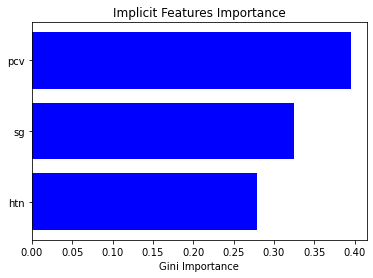

In [30]:
#b)Implicit feature importance
#####################################################

importances = xgboost_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Implicit Features Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_selected_xgb[i] for i in indices])
plt.xlabel('Gini Importance')
plt.show()

In [31]:
import eli5
from eli5 import show_weights
eli5.explain_weights(xgboost_clf, feature_names=features_selected_xgb)

Weight,Feature
0.3952,pcv
0.3255,sg
0.2793,htn


In [32]:
#c) Implicit feature importance for local explainability
###############################################################

y_pred = xgboost_clf.predict(df_X_test_featsel)
print('y_pred',y_pred)
print('y_test',y_test)

y_pred [1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1]
y_test [1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 0]


In [33]:
#predicting true negative - the patient DOES HAVE CKD
index_TN = 1
print(df_X_test_featsel.iloc[index_TN])
print('Actual Label:', y_test[index_TN])
print('Predicted Label:', y_pred[index_TN])
eli5.explain_prediction(xgboost_clf,df_X_test_featsel.iloc[index_TN], feature_names=features_selected_xgb)

pcv    0.820513
htn    0.000000
sg     4.000000
Name: 1, dtype: float64
Actual Label: 0
Predicted Label: 0


Explanation(estimator='XGBClassifier(random_state=42)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='pcv', weight=3.6608402157602695, std=None, value=0.8205128205128205), FeatureWeight(feature='sg', weight=1.2728908113701298, std=None, value=4.0), FeatureWeight(feature='htn', weight=0.9910535128728571, std=None, value=0.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-1.1315659168032561, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.99178237, score=-4.7932186232000005, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [34]:
#predicting true negative - the patient DOES NOT HAVE CKD
index_TP = 0
print(df_X_test_featsel.iloc[index_TP])
print('Actual Label:', y_test[index_TP])
print('Predicted Label:', y_pred[index_TP])
eli5.explain_prediction(xgboost_clf,df_X_test_featsel.iloc[index_TP], feature_names=features_selected_xgb)

pcv    0.512821
htn    1.000000
sg     2.000000
Name: 0, dtype: float64
Actual Label: 1
Predicted Label: 1


Explanation(estimator='XGBClassifier(random_state=42)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='pcv', weight=2.634358426765363, std=None, value=0.5128205128205128), FeatureWeight(feature='<BIAS>', weight=1.1315659168032561, std=None, value=1.0), FeatureWeight(feature='htn', weight=0.9977645095097468, std=None, value=1.0), FeatureWeight(feature='sg', weight=0.9250846226916356, std=None, value=2.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.9966276, score=5.6887734757700015, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [35]:
#d) Feature permutation importance
#############################################################
# With X_train
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(xgboost_clf).fit(df_X_train_featsel,y_train)
feat_perm_df=eli5.explain_weights_df(perm,feature_names=features_selected_xgb)
feat_perm_df

,feature,weight,std
0,pcv,0.222143,0.007284
1,sg,0.175714,0.008571
2,htn,0.143571,0.022745


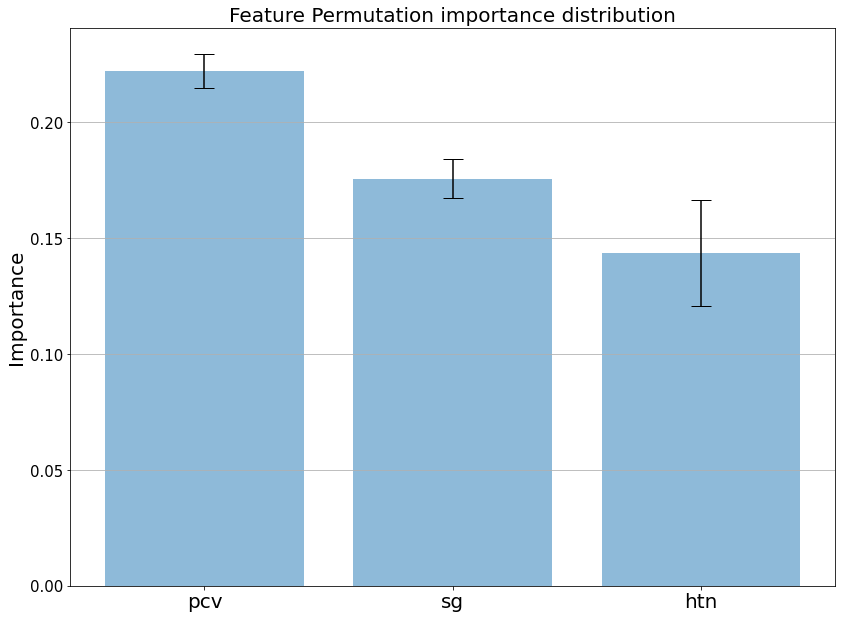

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
ax.bar(feat_perm_df['feature'], feat_perm_df['weight'], yerr=feat_perm_df['std'], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Importance', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(feat_perm_df['feature'])
ax.set_xticklabels(feat_perm_df['feature'], fontsize=20)
ax.set_title('Feature Permutation importance distribution', fontsize=20)
ax.yaxis.grid(True)

In [37]:
# With X_test
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(xgboost_clf).fit(df_X_test_featsel,y_test)
feat_perm_df=eli5.explain_weights_df(perm,feature_names=features_selected_xgb)
feat_perm_df

,feature,weight,std
0,pcv,0.178333,0.014530
1,sg,0.140000,0.020683
2,htn,0.118333,0.014337


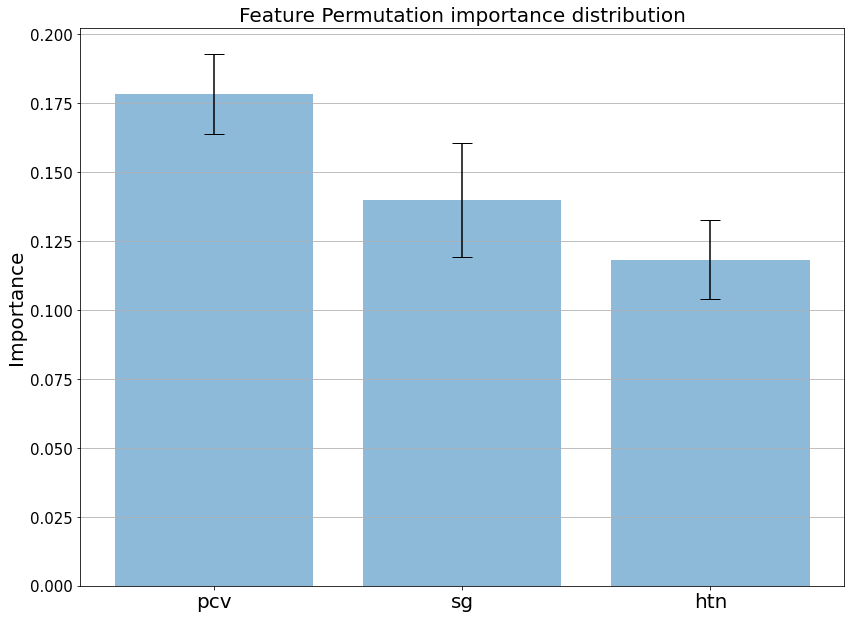

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
ax.bar(feat_perm_df['feature'], feat_perm_df['weight'], yerr=feat_perm_df['std'], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Importance', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(feat_perm_df['feature'])
ax.set_xticklabels(feat_perm_df['feature'], fontsize=20)
ax.set_title('Feature Permutation importance distribution', fontsize=20)
ax.yaxis.grid(True)

In [39]:
#import packages
from pdpbox import pdp, get_dataset, info_plots

In [40]:
pipeline_numeric_imputer_mean=Pipeline([ ('data_missing',missing_val_imput.Numeric_Imputer(strategy='mean'))])

pipeline_nominal_imputer=Pipeline([('data_missing',missing_val_imput.Category_Imputer()),
                                 ('encoding', OrdinalEncoder())])#We dont use OneHotEncoder since it enlarges the number of nominal features 

pipeline_ordinal_imputer=Pipeline([ ('data_missing',missing_val_imput.Category_Imputer(strategy='most_frequent'))])

dataimputer_pipe=ColumnTransformer([('numeric_pipe',pipeline_numeric_imputer_mean,numerical_feats_xgb),
                                    ('nominal_pipe',pipeline_nominal_imputer,nominal_feats_xgb),
                                    ('ordinal_pipe',pipeline_ordinal_imputer,ordinal_feats_xgb)
                                ])

X_train_imputed=dataimputer_pipe.fit_transform(X_train_feat_sel)
df_X_train_imputed=pd.DataFrame(X_train_imputed, columns=features_selected_xgb)
df_X_train_imputed.head()


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


,pcv,htn,sg
0,45.0,0.0,1.025
1,39.0,0.0,1.015
2,43.0,0.0,1.020
3,44.0,1.0,1.010
4,46.0,0.0,1.020



>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling tra

ValueError: keyword labelize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

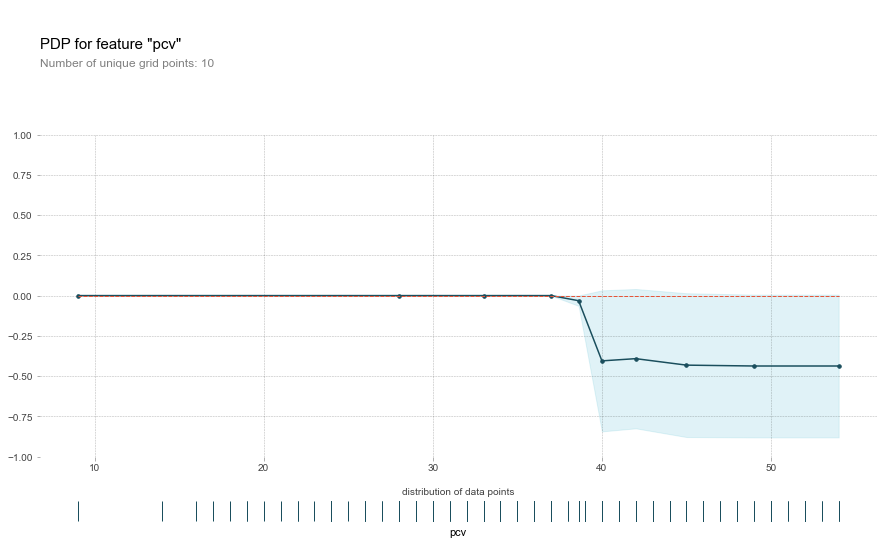

In [41]:
pipe_pdp_xgb=Pipeline([('data_prep',dataprep_merge_feat_xgb),
                          ('clf', xgboost_clf)])

model=pipe_pdp_xgb.fit(df_X_train_imputed,y_train)

pdp_pcv_Xtrain= pdp.pdp_isolate(model=model, dataset=df_X_train_imputed, model_features=df_X_train_imputed.columns, feature='pcv')
fig,axes=pdp.pdp_plot(pdp_pcv_Xtrain, 'pcv',plot_pts_dist=True, frac_to_plot=0.5)
axes['pdp_ax']['_pdp_ax'].set_ylim(ymin=-1, ymax=1)
axes['pdp_ax']['_pdp_ax'].tick_params(axis='both', labelize=15)
axes['pdp_ax']['_count_ax'].tick_params(axis='both', labelsize=15)
axes['pdp_ax']['_count_ax'].set_xlabel('pcv', fontsize=20)
axes['pdp_ax']['_count_ax'].set_title('distribution of data points', fontsize=13)

plt.show()


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling tra

ValueError: keyword labelize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

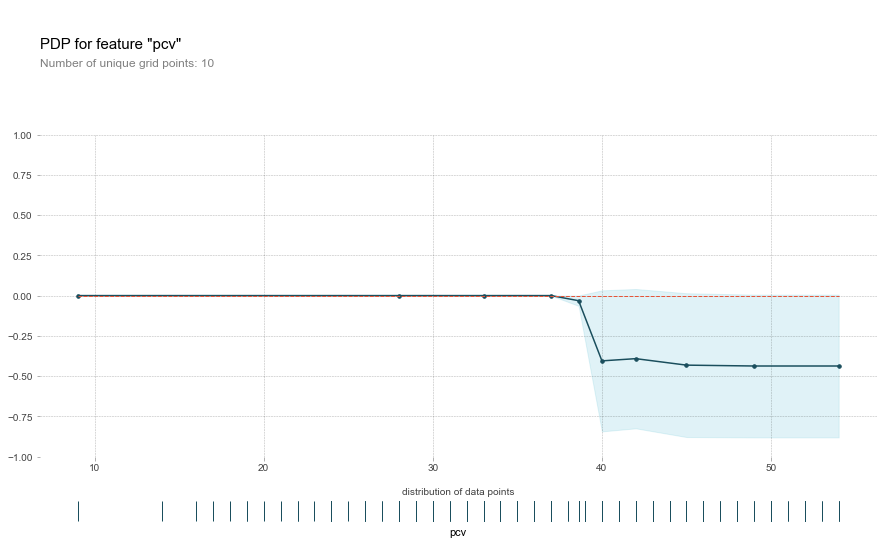

In [42]:
pipe_pdp_xgb=Pipeline([('data_prep',dataprep_merge_feat_xgb),
                          ('clf', xgboost_clf)])

model=pipe_pdp_xgb.fit(df_X_train_imputed,y_train)

pdp_pcv_Xtrain= pdp.pdp_isolate(model=model, dataset=df_X_train_imputed, model_features=df_X_train_imputed.columns, feature='pcv')
fig,axes=pdp.pdp_plot(pdp_pcv_Xtrain, 'pcv',plot_pts_dist=True, frac_to_plot=0.5)
axes['pdp_ax']['_pdp_ax'].set_ylim(ymin=-1, ymax=1)
axes['pdp_ax']['_pdp_ax'].tick_params(axis='both', labelize=15)
axes['pdp_ax']['_count_ax'].tick_params(axis='both', labelsize=15)
axes['pdp_ax']['_count_ax'].set_xlabel('pcv', fontsize=20)
axes['pdp_ax']['_count_ax'].set_title('distribution of data points', fontsize=13)

plt.show()


>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (2).

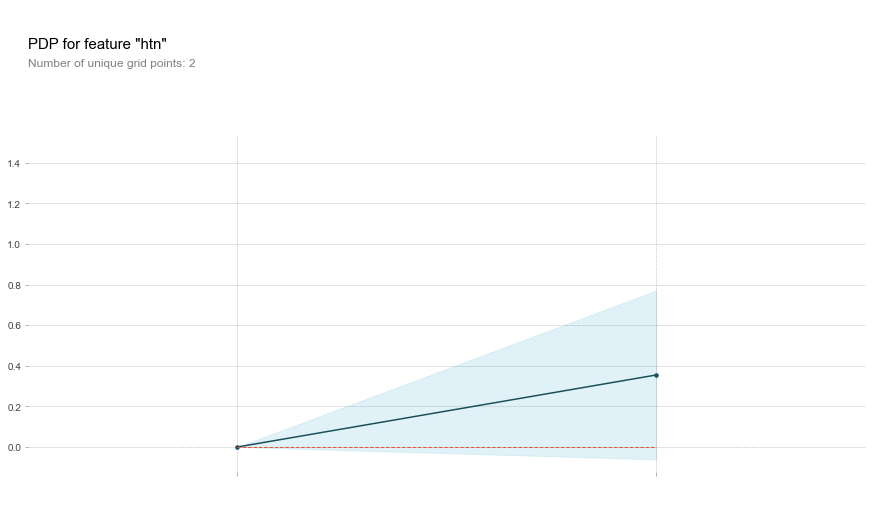

In [43]:
pdp_htn_Xtrain= pdp.pdp_isolate(model=model, dataset=df_X_train_imputed, model_features=df_X_train_imputed.columns, feature='htn')
fig,axes=pdp.pdp_plot(pdp_htn_Xtrain, 'htn',plot_pts_dist=True, frac_to_plot=0.5)
axes['pdp_ax']['_pdp_ax'].set_ylim(ymin=-1, ymax=1)
axes['pdp_ax']['_pdp_ax'].tick_params(axis='both', labelsize=15)
axes['pdp_ax']['_count_ax'].tick_params(axis='both', labelsize=15)
axes['pdp_ax']['_count_ax'].set_xlabel('htn', fontsize=20)
axes['pdp_ax']['_count_ax'].set_title('distribution of data points', fontsize=13)
plt.show()


>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Cate

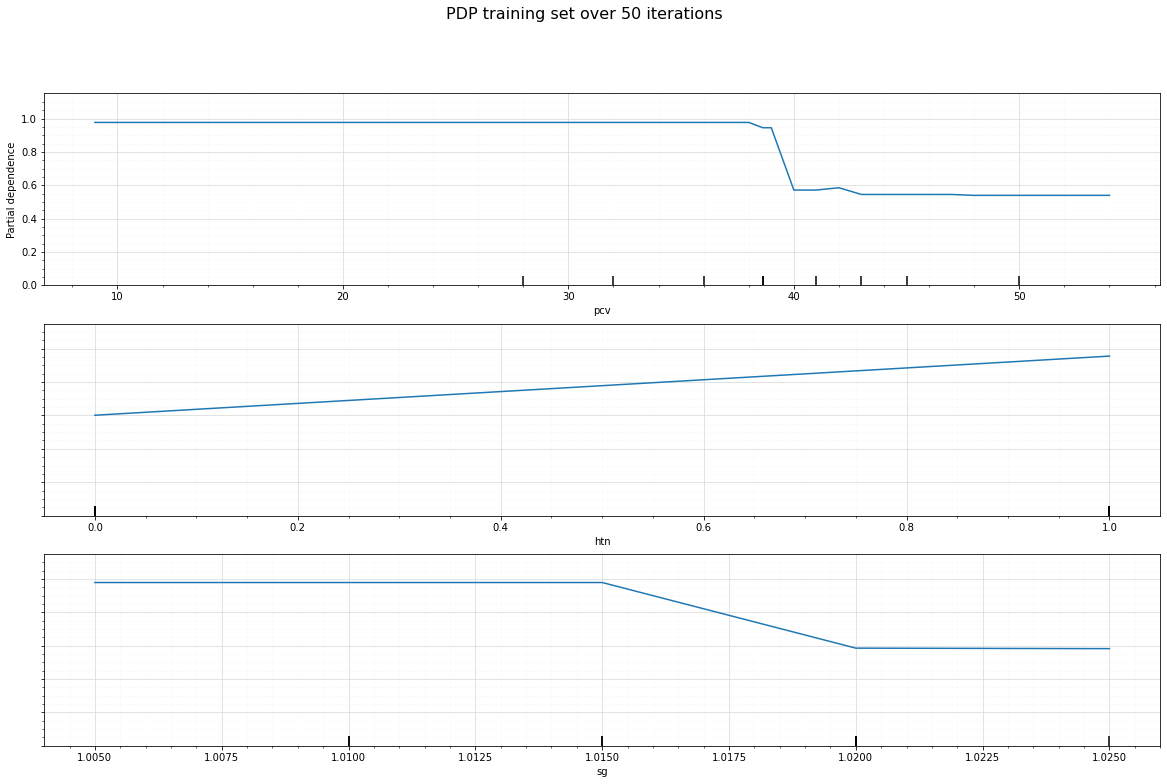

In [44]:
#d.2) PDP plots with sklearn
##########################################################
from sklearn.inspection import plot_partial_dependence

fig_train, (ax1) = plt.subplots(3, 1, figsize=(20, 12),)
pdp_train_inner=plot_partial_dependence(model, df_X_train_imputed,df_X_train_imputed.columns, ax=[ax1])

fig_train.suptitle('PDP training set over 50 iterations', fontsize=16)
def custom_axis(axis):
    axis.yaxis.grid(True)
    axis.xaxis.grid(True)
    axis.set_ylim(0,1.15)
    axis.grid(which='major', color='#DDDDDD', linewidth=0.8)
    axis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    axis.minorticks_on()
    
    
custom_axis(fig_train.axes[0])
custom_axis(fig_train.axes[1])
custom_axis(fig_train.axes[2])

In [45]:
#e) SHAP explainability - global explainability with Train Set
#####################################################

import shap
shap.initjs()

pipe_shap_xgb=Pipeline([('data_prep',dataprep_merge_feat_xgb),
                          ('clf', xgboost_clf)])
pipe_shap_xgb.fit(df_X_train_imputed, y_train)


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


Pipeline(steps=[('data_prep',
                 ColumnTransformer(transformers=[('numeric_pipe',
                                                  Pipeline(steps=[('data_missing',
                                                                   Numeric_Imputer(strategy='mean')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pcv']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('data_missing',
                                                                   Category_Imputer()),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['htn']),
                                

In [46]:
explainer=shap.explainers.Tree(pipe_shap_xgb.named_steps['clf'], pipe_shap_xgb.named_steps['data_prep'].fit_transform(df_X_train_imputed))
shap_values=explainer.shap_values(pipe_shap_xgb.named_steps['data_prep'].fit_transform(df_X_train_imputed))


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


In [47]:
shap_values.shape

(280, 3)

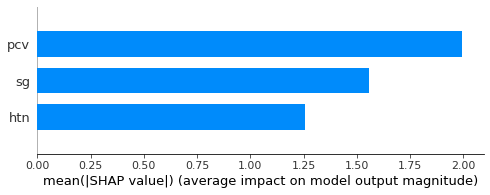

In [48]:
shap.summary_plot(shap_values, df_X_train_imputed,plot_type="bar")

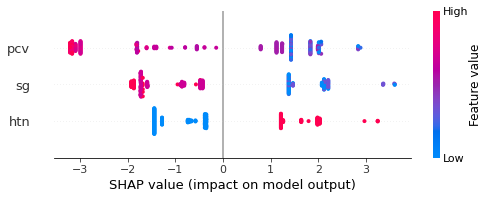

In [49]:
shap.summary_plot(shap_values, df_X_train_imputed,plot_type="dot")

In [50]:
y_pred_train=pipe_shap_xgb.predict(df_X_train_imputed)


>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


In [51]:
print(y_pred_train)
print(y_train)
print(accuracy_score(y_train, y_pred_train))

##FIXME the shap values is the same for the TN and TP

[0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0]
[0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0

In [52]:
#True negative instance
index_TN =0
print(df_X_train_imputed.iloc[index_TN])
print('Actual Label:', y_train[index_TN])
print('Predicted Label:', y_pred_train[index_TN])
choosen_instance_tn=df_X_train_imputed.iloc[[index_TN]]

pcv    45.000
htn     0.000
sg      1.025
Name: 0, dtype: float64
Actual Label: 0
Predicted Label: 0


In [53]:
explainer.expected_value

1.6601787668053294

In [57]:
choosen_instance_tn

pcv    45.000
htn     0.000
sg      1.025
Name: 0, dtype: float64

In [59]:
#True positive instance
index_TP=1
print(df_X_train_imputed.iloc[index_TP])
print('Actual Label:', y_train[index_TP])
print('Predicted Label:', y_pred_train[index_TP])
choosen_instance_tp=df_X_train_imputed.iloc[index_TP]

pcv    39.000
htn     0.000
sg      1.015
Name: 1, dtype: float64
Actual Label: 1
Predicted Label: 1


In [61]:
shap_values_tn = shap_values[index_TN]

In [62]:
shap_values_tn = shap_values[index_TN]
shap_values_tn

array([-3.0926887 , -1.4396762 , -1.92103248])

In [64]:
shap_values_tn = shap_values[index_TN]
shap.force_plot(explainer.expected_value, shap_values_tn, choosen_instance_tn)

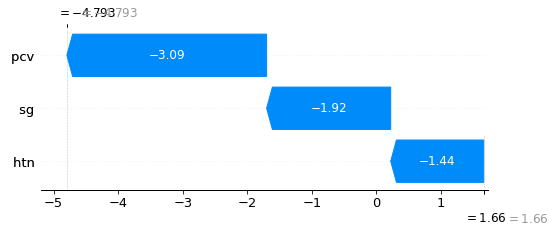

In [65]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_tn, choosen_instance_tn)

In [66]:
shap_values_tp = shap_values[index_TP]
shap.force_plot(explainer.expected_value, shap_values_tp, choosen_instance_tp)

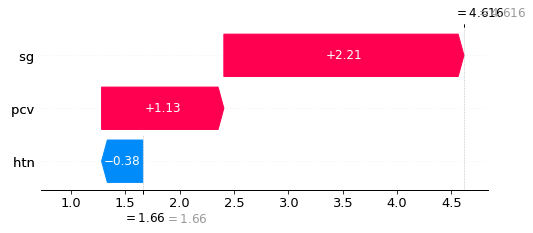

In [67]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_tp, choosen_instance_tp)
#shap.force_plot(explainer.expected value, shapshap_values[index,:], X_train_feat_selected.iloc[index,:])

In [68]:
X_test_imputed=dataimputer_pipe.fit_transform(X_test_feat_sel)
df_X_test_imputed=pd.DataFrame(X_test_imputed, columns=features_selected_xgb)
df_X_test_imputed.head()


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


,pcv,htn,sg
0,35.0,1.0,1.015
1,47.0,0.0,1.025
2,23.0,1.0,1.015
3,48.0,0.0,1.020
4,36.0,0.0,1.010


In [73]:
shap_values_test=explainer.shap_values(pipe_shap_xgb.named_steps['data_prep'].fit_transform(df_X_test_imputed))


>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


In [74]:
shap_values_test.shape

(120, 3)

In [75]:
#y_pred = xgboost_clf.predict(X_test_imputed)
y_pred_test=pipe_shap_xgb.predict(df_X_test_imputed)


>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer


In [76]:
print('y_pred',y_pred_test)
print('y_test',y_test)
print(accuracy_score(y_test, y_pred_test))

y_pred [1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1]
y_test [1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 0]
0.9166666666666666


In [81]:
#True negative instance
index_TN =1
print(df_X_test_imputed.iloc[index_TN])
print('Actual Label:', y_test[index_TN])
print('Predicted Label:', y_pred_test[index_TN])
choosen_instance_tn=df_X_test_imputed.iloc[index_TN]

pcv    47.000
htn     0.000
sg      1.025
Name: 1, dtype: float64
Actual Label: 0
Predicted Label: 0


In [82]:
shap_values_test_tn = shap_values_test[index_TN]
shap.force_plot(explainer.expected_value, shap_values_test_tn, choosen_instance_tn)

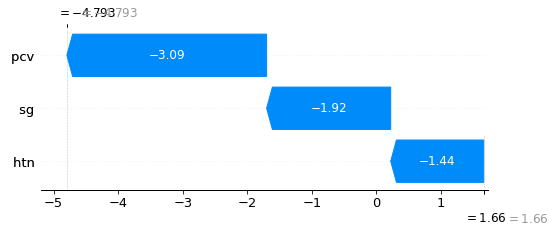

In [85]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_test_tn, choosen_instance_tn)

In [86]:
#True negative instance
index_TP=0
print(df_X_test_imputed.iloc[index_TP])
print('Actual Label:', y_test[index_TP])
print('Predicted Label:', y_pred[index_TP])
choosen_instance_tp=df_X_test_imputed.iloc[index_TP]

pcv    35.000
htn     1.000
sg      1.015
Name: 0, dtype: float64
Actual Label: 1
Predicted Label: 1


In [87]:
shap_values_tp = shap_values_test[index_TP]
shap.force_plot(explainer.expected_value, shap_values_tp, choosen_instance_tp)

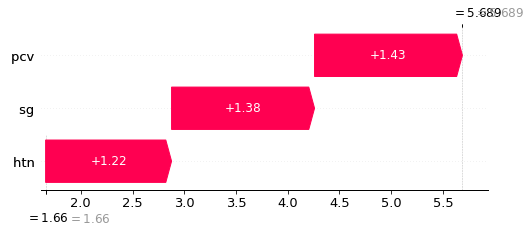

In [88]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_tp, choosen_instance_tp)